# Setting up 

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model

from sklearn.ensemble import RandomForestClassifier
import pickle


# Convolutional 

In [13]:
class Conv_MNISTClassifier:
    def __init__(self):
        self.model = None

    def download_dataset(self):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()

    def create_model(self):
        self.model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ])

        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    def train_model(self, epochs=10):
        self.x_train = self.x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
        self.x_test = self.x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
        self.y_train = to_categorical(self.y_train)
        self.y_test = to_categorical(self.y_test)

        self.model.fit(self.x_train, self.y_train, epochs=epochs, validation_data=(self.x_test, self.y_test))

    def save_model(self, filename='models/mnist_model.keras'):
        self.model.save(filename)

    def predict_class(self, image_path): 
        self.model = load_model('models/mnist_model.keras')
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = img.reshape(-1, 28, 28, 1).astype('float32') / 255

        predicted_class = self.model.predict(img).argmax()
        print("Predicted class:", predicted_class)

        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.show()


In [5]:
conv_classifier = Conv_MNISTClassifier()
conv_classifier.download_dataset()
conv_classifier.create_model()
conv_classifier.train_model()
conv_classifier.save_model()


/Users/dkulish/Projects/DS_Engineer/ds_eng/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9058 - loss: 0.3087 - val_accuracy: 0.9840 - val_loss: 0.0486
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9854 - loss: 0.0466 - val_accuracy: 0.9885 - val_loss: 0.0327
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.9923 - val_loss: 0.0247
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9902 - val_loss: 0.0318
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 0.9873 - val_loss: 0.0413
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.9965 - loss: 0.0119 - val_accuracy: 0.9909 - val_loss: 0.0338
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9973 - loss: 0.0082 - val_accuracy: 0.9910 - val_loss: 0.0287
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9983 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class: 2


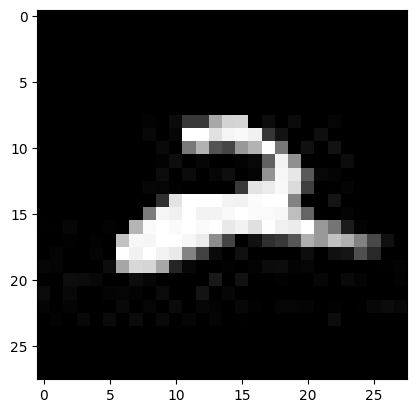

In [16]:
conv_classifier.predict_class("images/img_815.jpg")


# Random Forest 

In [18]:

class RandomForest_MNISClassifier:
    def __init__(self):
        self.model = None

    def download_dataset(self):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()

    def create_model(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)

    def train_model(self):
        self.x_train = self.x_train.reshape(-1, 28 * 28).astype('float32') / 255
        self.x_test = self.x_test.reshape(-1, 28 * 28).astype('float32') / 255
        self.y_train = to_categorical(self.y_train)
        self.y_test = to_categorical(self.y_test)

        self.model.fit(self.x_train, self.y_train)

    def save_model(self, filename='models/mnist_rf_model.pkl'):
        with open(filename, 'wb') as f:
            pickle.dump(self.model, f)

    def predict_class(self, image_path):
        with open('models/mnist_rf_model.pkl', 'rb') as f:
           self.model = pickle.load(f)

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = img.reshape(-1, 28 * 28).astype('float32') / 255

        predicted_class = self.model.predict(img)
        print("Predicted class:", predicted_class)

        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.show()



In [19]:
rf_classifier = RandomForest_MNISClassifier()


In [20]:
# rf_classifier = RandomForest_MNISClassifier()
rf_classifier.download_dataset()
rf_classifier.create_model()
rf_classifier.train_model()
rf_classifier.save_model()


Predicted class: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


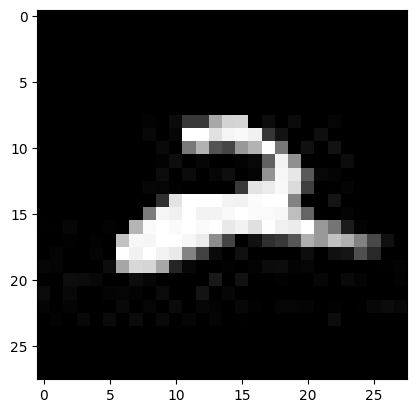

In [21]:
rf_classifier.predict_class("images/img_815.jpg")
